In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import confusion_matrix, classification_report, f1_score


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/label_encoding_standard_scaling_data.csv", delimiter=",")
print(df.shape)
df.head()

(5976, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1.611381,1,2,2,1,1,1,1,1,1,2,0,1,-1.353483,-0.247769,0
1,0,0,0,0,0.468468,1,0,1,0,2,2,0,2,0,0,1,1,0.774066,0.736669,0
2,0,1,1,0,0.223558,1,2,1,0,0,0,0,0,0,0,1,0,0.335602,0.251453,1
3,1,0,0,0,-1.164265,1,0,0,0,0,0,0,0,2,0,1,2,-0.297182,-0.905725,0
4,1,0,0,0,-1.245901,1,0,0,2,0,2,0,0,0,0,0,2,-0.378564,-0.958057,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   int64  
 1   SeniorCitizen     5976 non-null   int64  
 2   Partner           5976 non-null   int64  
 3   Dependents        5976 non-null   int64  
 4   tenure            5976 non-null   float64
 5   PhoneService      5976 non-null   int64  
 6   MultipleLines     5976 non-null   int64  
 7   InternetService   5976 non-null   int64  
 8   OnlineSecurity    5976 non-null   int64  
 9   OnlineBackup      5976 non-null   int64  
 10  DeviceProtection  5976 non-null   int64  
 11  TechSupport       5976 non-null   int64  
 12  StreamingTV       5976 non-null   int64  
 13  StreamingMovies   5976 non-null   int64  
 14  Contract          5976 non-null   int64  
 15  PaperlessBilling  5976 non-null   int64  
 16  PaymentMethod     5976 non-null   int64  


In [6]:
df.columns.unique()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

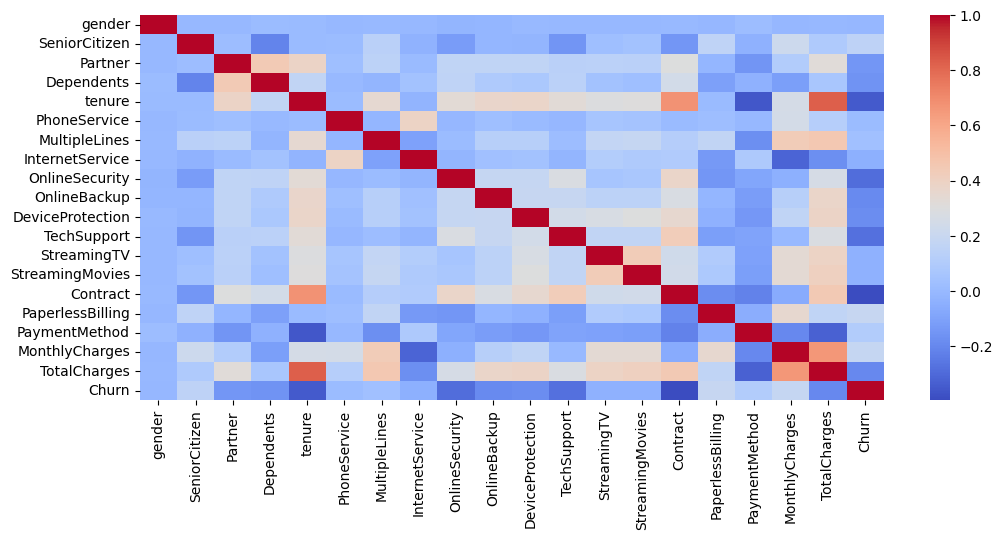

In [12]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm');

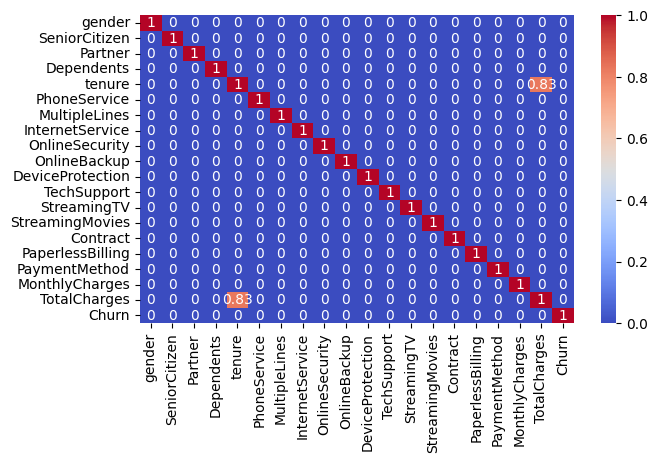

In [13]:
r = df.corr()
r[abs(r) <= 0.75] = 0
plt.figure(figsize=(7, 4))
sns.heatmap(r, annot=True, cmap='coolwarm');

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']),
                                                    df['Churn'],
                                                    test_size=0.3,
                                                    random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4183, 19), (1793, 19), (4183,), (1793,))

In [16]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features, numeric_features

([],
 ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges'])

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [18]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [19]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", StandardScaler().set_output(transform="pandas"))
                                      ])

numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', StandardScaler())])

In [20]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'tenure', 'PhoneService',
                                  'MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

In [21]:
pipeline_xgb = Pipeline([("pre_process", preprocessor),
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [22]:
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
scores = {}
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

In [24]:
feature_names = pipeline_xgb['pre_process'].get_feature_names_out()
feature_names

array(['num__gender', 'num__SeniorCitizen', 'num__Partner',
       'num__Dependents', 'num__tenure', 'num__PhoneService',
       'num__MultipleLines', 'num__InternetService',
       'num__OnlineSecurity', 'num__OnlineBackup',
       'num__DeviceProtection', 'num__TechSupport', 'num__StreamingTV',
       'num__StreamingMovies', 'num__Contract', 'num__PaperlessBilling',
       'num__PaymentMethod', 'num__MonthlyCharges', 'num__TotalCharges'],
      dtype=object)

In [25]:
xgb_model = pipeline_xgb['model']
xgb_model.feature_importances_

array([0.02032135, 0.02464778, 0.01690866, 0.01933803, 0.03228726,
       0.02083303, 0.02420487, 0.09187253, 0.07681071, 0.02424974,
       0.0240688 , 0.03756967, 0.02387198, 0.02891319, 0.4425508 ,
       0.02656948, 0.0179363 , 0.02429755, 0.02274819], dtype=float32)

In [26]:
xgb_importances = pd.DataFrame(
    {"feature": feature_names, "importance": np.round(xgb_model.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
xgb_importances.head(20)

,importance
feature,
num__Contract,0.443
num__InternetService,0.092
num__OnlineSecurity,0.077
num__TechSupport,0.038
num__tenure,0.032
num__StreamingMovies,0.029
num__PaperlessBilling,0.027
num__SeniorCitizen,0.025
num__OnlineBackup,0.024


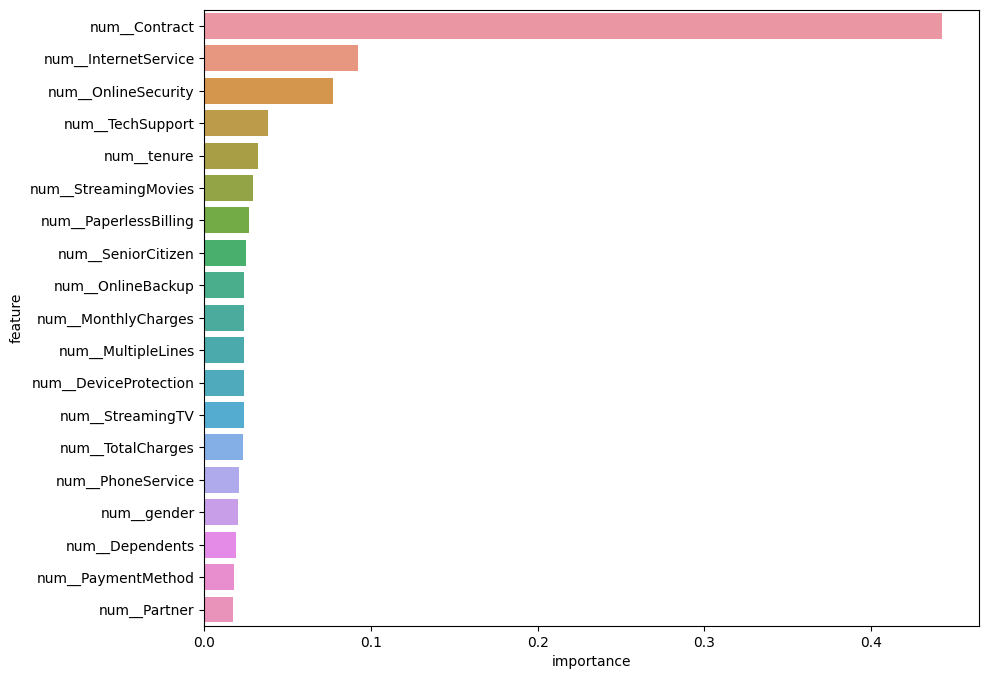

In [27]:
plt.figure(figsize=(10, 8))
sns.barplot(y=xgb_importances.head(30).index,
            x=xgb_importances.head(30).importance);

In [29]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=f0c1c26b42d25cb89cfdef0b3a644da2ddde5fddfbe986e5aa3fdd3661d7e13a
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [30]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=650490adf2c07d745edb9959b63c3bef6b62d528c2b4a6e8abb634044a7041c6
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [31]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 1.6 MB/s eta 0:00:00


In [32]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgil43wga
  JVM stdout: /tmp/tmpgil43wga/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgil43wga/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,21 hours and 42 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_wdymdc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [35]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data = h2o.H2OFrame.from_python(train_data)
train_data['Churn'] = train_data['Churn'].asfactor()
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,-1.28672,1,2,0,0,0,0,0,0,0,0,1,2,-0.489841,-0.988577,0
1,0,0,0,-0.919355,1,2,0,0,0,0,0,2,2,0,1,1,0.242594,-0.661325,1
0,0,0,0,-0.266262,1,2,1,0,0,2,0,2,2,0,1,0,1.1843,0.132761,0
1,0,0,0,-0.715263,1,2,1,0,0,0,0,2,2,0,1,2,0.946795,-0.375301,1
1,0,1,1,-1.00099,1,0,2,1,1,1,1,1,1,2,0,3,-1.49964,-0.953329,0
1,0,0,0,-1.28672,1,0,0,0,0,2,0,0,0,0,1,2,-0.476554,-0.988401,1
1,0,0,1,-1.20508,1,0,1,0,0,0,0,0,0,0,0,2,0.159552,-0.913816,1
0,0,1,1,1.28483,1,2,2,1,1,1,1,1,1,2,1,3,-1.35514,-0.324948,0
1,1,1,0,1.24402,1,0,0,2,2,2,2,2,2,1,1,0,0.636216,1.33315,0
1,0,0,0,1.12156,1,2,1,0,0,2,0,2,0,2,1,2,0.82057,1.28989,0


In [36]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml.train(x=X_train.columns.tolist(), y="Churn", training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231221_141519


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    34                 34                          12667                  6            11           7.64706       23            27            24.9118

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12250867863543165
RMSE: 0.3500123978310363
LogLoss: 0.38124114057913744
Mean Per-Class Error: 0.20806517150858567
AUC: 0.8791864231383119
AUCPR: 0.7213085077148637
Gini: 0.7583728462766237

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3453986076738721
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      2559  509   0.1659   (509.0/3068.0)
1      279   836   0.2502   (279.0/1115.0)
Total  2838  1345  0.1884   (788.0/4183.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.345399     0.679675  201
max f2                       0.160434     0.77513   297
max f0point5                 0.448719     0.679397  153
max accuracy                 0.445247     0.826201  155
max precision                0.878278     1         0
max recall                   0.0281223    1         386
max specificity              0.878278     1         0
max absolute_mcc             0.345399     0.552731  201
max min_per_class_accuracy   0.31008      0.794619  219
max mean_per_class_accuracy  0.312196     0.796877  218
max tns                      0.878278     3068      0
max fns                      0.878278     1113      0
max fps                      0.0166194    3068      399
max tps                      0.0281223    1115      386
max tnr                      0.878278     1         0
max fnr                      0.878278     0.998206  0
max fpr                      0.0166194    1         399
max tpr                      0.0281223    1         386

Gains/Lift Table: Avg response rate: 26.66 %, avg score: 26.63 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100406                   0.829394           3.57292     3.57292            0.952381         0.847662   0.952381                    0.847662            0.0358744       0.0358744                  257.292   257.292            0.0352225
2        0.0200813                   0.808627           3.21563     3.39428            0.857143         0.819161   0.904762                    0.833412            0.032287        0.0681614                  221.563   239.428            0.0655539
3        0.0301219                   0.795204           3.39428     3.39428            0.904762         0.803383   0.904762                    0.823402            0.0340807       0.102242                   239.428   239.428            0.0983308
4        0.0401626                   0.775519           3.39428     3.39428            0.904762         0.785094   0.904762                    0.813825            0.0340807       0.136323                   239.428   239.428            0.131108
5        0.0502032                   0.753764           3.39428     3.39428            0.904762         0.763579   0.904762          

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_1_20231221_123331,0.845586,0.41803,0.661959,0.23459,0.368348,0.13568,2942,0.063303,GBM
GBM_grid_1_AutoML_1_20231221_123331_model_2,0.844755,0.419542,0.65407,0.229487,0.368886,0.136077,365,0.028948,GBM
GLM_1_AutoML_1_20231221_123331,0.843921,0.421145,0.652482,0.234946,0.369782,0.136739,1129,0.004835,GLM
GBM_grid_1_AutoML_1_20231221_123331_model_4,0.842161,0.421252,0.658798,0.228611,0.370085,0.136963,872,0.02869,GBM
GBM_grid_1_AutoML_1_20231221_123331_model_3,0.84079,0.423308,0.653968,0.238532,0.371235,0.137816,450,0.039975,GBM
GBM_5_AutoML_1_20231221_123331,0.838591,0.426421,0.645491,0.23647,0.372553,0.138796,525,0.054854,GBM
GBM_2_AutoML_1_20231221_123331,0.837167,0.427865,0.647404,0.238084,0.372761,0.13895,805,0.046323,GBM
GBM_3_AutoML_1_20231221_123331,0.835148,0.431462,0.637327,0.248098,0.374787,0.140466,670,0.050212,GBM
XGBoost_grid_1_AutoML_1_20231221_123331_model_7,0.834263,0.435243,0.632988,0.236601,0.377586,0.142571,1791,0.01901,XGBoost
GBM_4_AutoML_1_20231221_123331,0.833454,0.433234,0.644614,0.246998,0.375768,0.141202,852,0.052699,GBM


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1321
           1       0.55      0.73      0.63       472

    accuracy                           0.77      1793
   macro avg       0.72      0.76      0.73      1793
weighted avg       0.80      0.77      0.78      1793



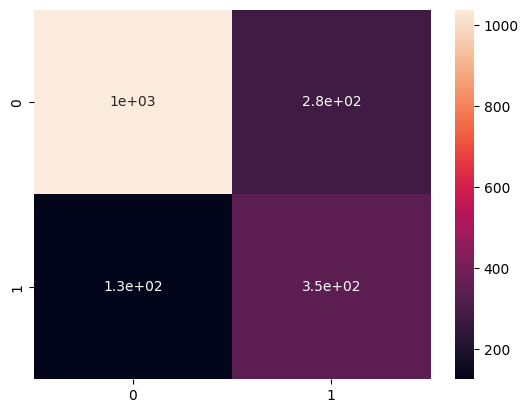

In [37]:
best_model =  aml.get_best_model(criterion="mean_per_class_error")
X_test_h2o = h2o.H2OFrame.from_python(X_test)
y_pred = best_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True);